In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2022-06-07 12:43:23.235672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 12:43:23.235702: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [3]:
adata = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 22296 × 27059
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'DF.classifications', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'label', 'sample'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_mnn', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'MNN', 'PCs'
    obsp: 'distances'

<AxesSubplot:title={'center':'Cell clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

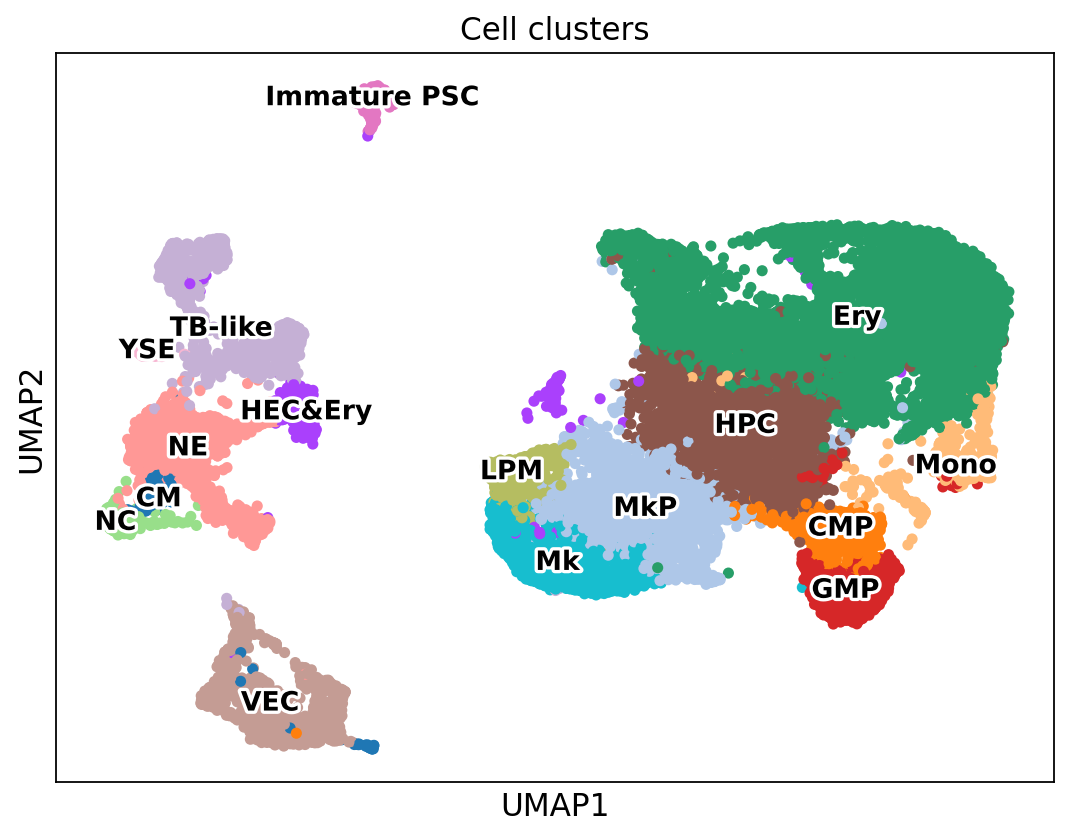

In [4]:
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(adata, color=['celltype'], legend_loc="on data", legend_fontsize=12, size=100, show=False, 
           legend_fontoutline=3, title = 'Cell clusters')

In [5]:
adata.uns['celltype_colors'] = ['#E73986', '#F885BC', '#477AB4', '#A45B30', '#ACE093', '#E23624', 
                                '#FA9F9A', '#2E2985', '#9B4D9E', '#41AF58', '#109D7A', '#DDC23D', 
                                '#EE9B32', '#62ACE0', '#BF9BC9', '#911740']

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
--> added 'pos', the PAGA positions (adata.uns['paga'])


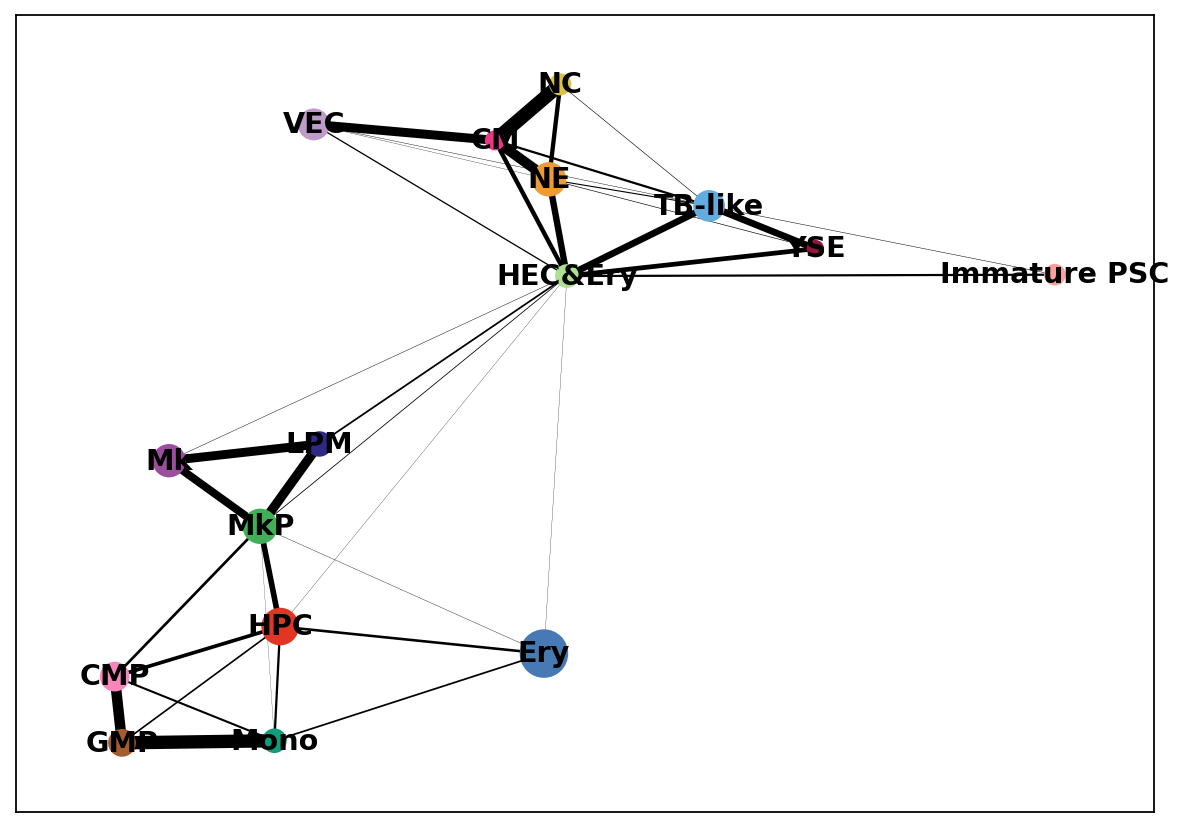

In [6]:
sc.tl.paga(adata, groups='celltype')
sc.pl.paga(adata, color=['celltype'])

In [7]:
sc.pp.neighbors(adata)
sc.tl.draw_graph(adata, init_pos='paga')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:03:26)


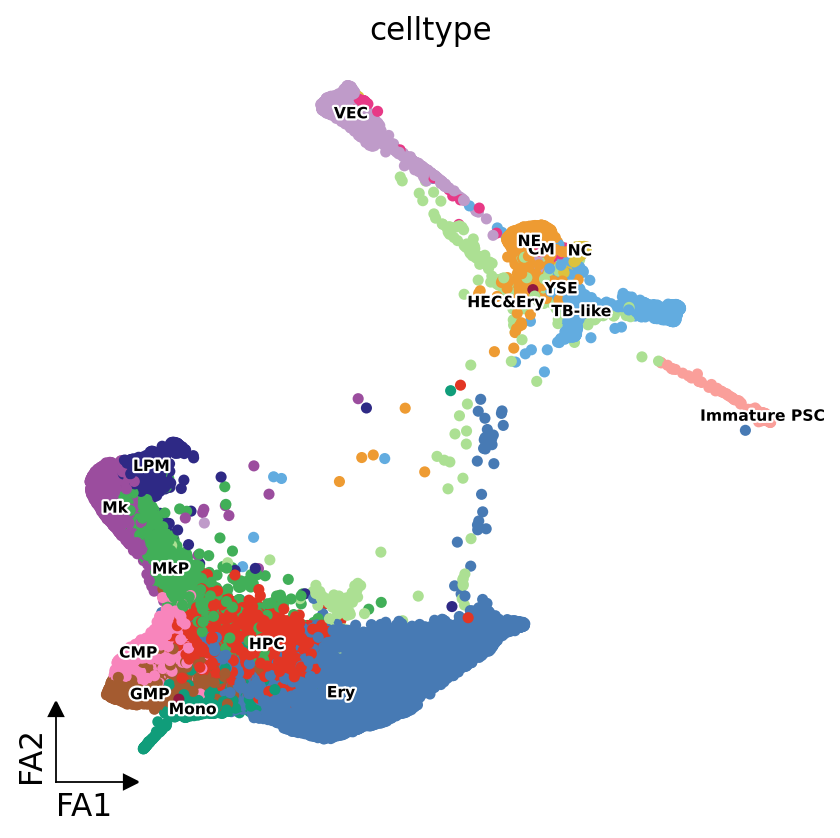

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.draw_graph(adata, color=['celltype'], legend_loc='on data', legend_fontsize=7, size=100, ax=ax, 
                 legend_fontoutline=2, show=False)

shrink_by = 0.1
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xbound = xlim[0] + (xlim[1] - xlim[0]) * shrink_by
ybound = ylim[0] + (ylim[1] - ylim[0]) * shrink_by

b = ax.spines["bottom"]
b.set_bounds(xlim[0], xbound)
ax.set_xlabel(ax.get_xlabel(), x=0, ha="left")
ax.plot(xbound, 0, ">k", transform=ax.get_xaxis_transform(), clip_on=False)

b = ax.spines["left"]
b.set_bounds(ylim[0], ybound)
ax.set_ylabel(ax.get_ylabel(), y=0, ha="left")
ax.plot(0, ybound, "^k", transform=ax.get_yaxis_transform(), clip_on=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [9]:
adata

AnnData object with n_obs × n_vars = 22296 × 27059
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'DF.classifications', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'label', 'sample'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'paga', 'celltype_sizes', 'draw_graph'
    obsm: 'X_mnn', 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fa'
    varm: 'MNN', 'PCs'
    obsp: 'distances', 'connectivities'

In [10]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['celltype']  == 'Immature PSC')[0]

In [11]:
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99927217 0.9977381  0.99730927 0.9942704  0.9940988
     0.99137133 0.9886237  0.98839307 0.98518544 0.9849202  0.9827836
     0.98203295 0.97798413 0.97577935]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:02)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [12]:
adata_raw = adata.raw.to_adata()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


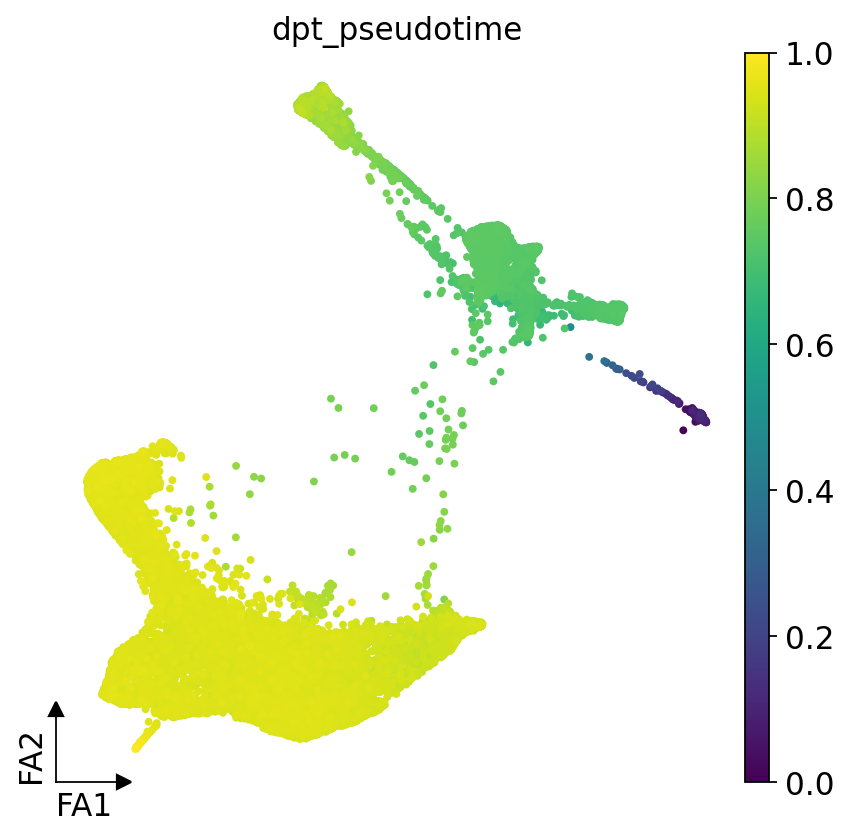

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], size=50, ax=ax, 
                 show=False)

shrink_by = 0.1
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xbound = xlim[0] + (xlim[1] - xlim[0]) * shrink_by
ybound = ylim[0] + (ylim[1] - ylim[0]) * shrink_by

b = ax.spines["bottom"]
b.set_bounds(xlim[0], xbound)
ax.set_xlabel(ax.get_xlabel(), x=0, ha="left")
ax.plot(xbound, 0, ">k", transform=ax.get_xaxis_transform(), clip_on=False)

b = ax.spines["left"]
b.set_bounds(ylim[0], ybound)
ax.set_ylabel(ax.get_ylabel(), y=0, ha="left")
ax.plot(0, ybound, "^k", transform=ax.get_yaxis_transform(), clip_on=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)